In [1]:
%run MyTools.ipynb

vertices: [0, 1, 2, 3]
edges: [(0, 1, None), (0, 2, None), (1, 2, None), (2, 3, None)]


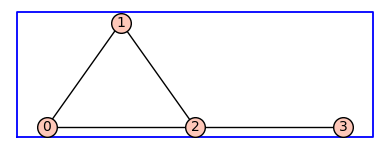

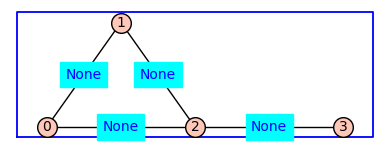

In [2]:
pos = {0: (0, 0), 1: (1, 1.41), 2: (2, 0), 3: (4,0)} # vertex positions
G = Graph({0: [1, 2], 1: [2], 2: [3]},pos=pos)

print('vertices:',G.vertices(sort=True))
print('edges:',G.edges(sort=True))

G.show(figsize=4,graph_border=True)
G.show(figsize=4,graph_border=True,edge_labels=True)

In [3]:
? add_vertex_monomials

Help on function add_vertex_monomials in module __main__:

add_vertex_monomials(G=Graph on 0 vertices, method='integer', ring=False)
    Add monomials to vertices of a graph. 
    
    The add_vertex_monomials function takes a graph G, as well as optional parameters method and ring. The function creates a new graph H with vertices labeled by monomials. The monomials are chosen based on the number of vertices in G. If the method parameter is set to 'alpha' and the number of vertices in G is less than or equal to 10, the monomials are chosen as alphabetical letters ('a' to 'k'). Otherwise, the monomials are chosen as strings of the form 'a0', 'a1', ..., 'an-1', where n is the number of vertices in G. The function then adds the vertices from G to H using the monomials as labels, and adds the edges from G to H using the monomials as endpoints. If the ring parameter is set to True, the function also creates a polynomial ring V with the chosen monomials and 'invlex' order, and returns both H

In [4]:
%pdef add_vertex_monomials

 add_vertex_monomials(G=Graph on 0 vertices, method='integer', ring=False)
 

In [5]:
%pdoc add_vertex_monomials

"Help on function add_vertex_monomials in module __main__:\n\nadd_vertex_monomials(G=Graph on 0 vertices, method='integer', ring=False)\n    Add monomials to vertices of a graph. \n    \n    The add_vertex_monomials function takes a graph G, as well as optional parameters method and ring. The function creates a new graph H with vertices labeled by monomials. The monomials are chosen based on the number of vertices in G. If the method parameter is set to 'alpha' and the number of vertices in G is less than or equal to 10, the monomials are chosen as alphabetical letters ('a' to 'k'). Otherwise, the monomials are chosen as strings of the form 'a0', 'a1', ..., 'an-1', where n is the number of vertices in G. The function then adds the vertices from G to H using the monomials as labels, and adds the edges from G to H using the monomials as endpoints. If the ring parameter is set to True, the function also creates a polynomial ring V with the chosen monomials and 'invlex' order, and returns 

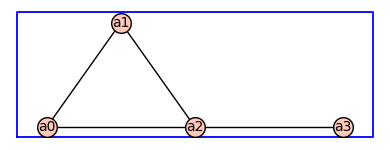

In [6]:
H=add_vertex_monomials(G)
H.show(figsize=4,graph_border=True)

In [7]:
G=add_edge_monomials(G)

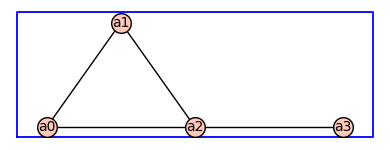

In [8]:
H=add_edge_monomials(H)
H.show(figsize=4,graph_border=True)

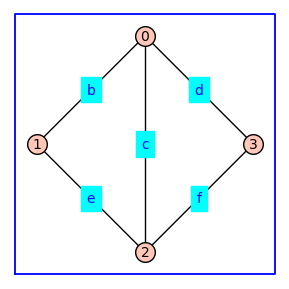

In [9]:
G = graphs.CycleGraph(4); G.add_edge(0,2)
G = add_edge_monomials(G,method='alpha')
G.show(figsize=4,graph_border=True,edge_labels=True)

In [10]:
(G,V) = add_vertex_monomials(graphs.HouseGraph(),ring=True)
show(V)

Multivariate Polynomial Ring in a0, a1, a2, a3, a4 over Integer Ring

In [11]:
from IPython.display import display, Math
display(Math('\\eta \\beta \\alpha \\kappa'))

<IPython.core.display.Math object>

In [12]:
from IPython.display import display, Math
display(Math(latex(V)))

<IPython.core.display.Math object>

In [13]:
V.inject_variables()
fv = (a0+a1)*(a0+a3+a4)^2
print(fv)

Defining a0, a1, a2, a3, a4
a1*a4^2 + a0*a4^2 + 2*a1*a3*a4 + 2*a0*a3*a4 + 2*a0*a1*a4 + 2*a0^2*a4 + a1*a3^2 + a0*a3^2 + 2*a0*a1*a3 + 2*a0^2*a3 + a0^2*a1 + a0^3


In [14]:
(G,E) = add_edge_monomials(graphs.HouseGraph(),method='alpha',ring=True)
show(E)

Multivariate Polynomial Ring in b, c, d, e, f, g over Integer Ring

In [15]:
E.inject_variables()
fe = (b+c)*(b+e+f)^2
print(fe)

Defining b, c, d, e, f, g
c*f^2 + b*f^2 + 2*c*e*f + 2*b*e*f + 2*b*c*f + 2*b^2*f + c*e^2 + b*e^2 + 2*b*c*e + 2*b^2*e + b^2*c + b^3


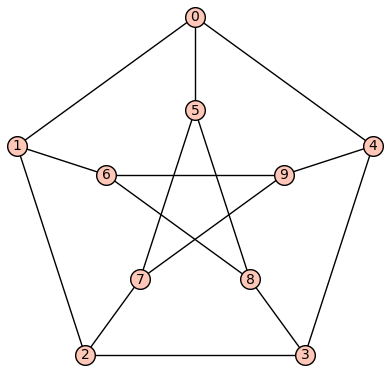

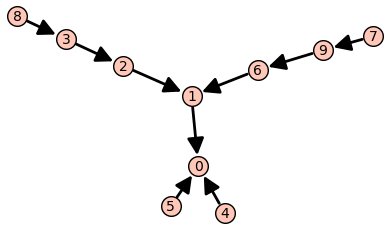

[0, 1, 4, 5, 2, 6, 3, 9, 7, 8]

In [16]:
P = graphs.PetersenGraph()
P.show(edge_labels=False)
(BFSVertexList,BFSTree) = P.lex_BFS(tree=True,initial_vertex=0)
BFSTree.show(edge_labels=False)
show(BFSVertexList)


In [17]:
d = dict((v,i) for i, v in enumerate(BFSVertexList))
print(d)

{0: 0, 1: 1, 4: 2, 5: 3, 2: 4, 6: 5, 3: 6, 9: 7, 7: 8, 8: 9}


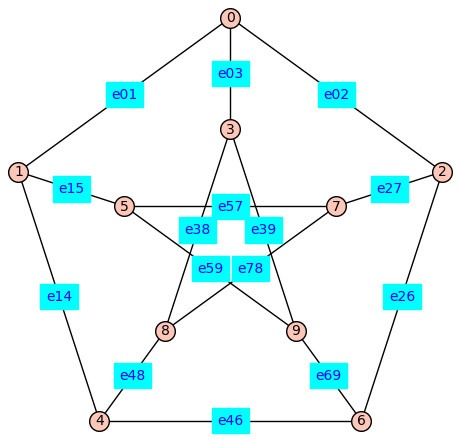

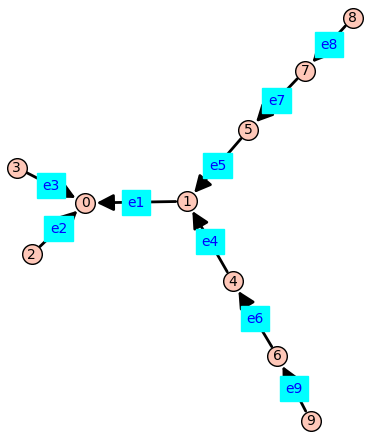

In [18]:
P2 = P.copy()
P2.relabel(d)
P2 = add_edge_monomials(P2)
P2.show(figsize=6,edge_labels=True)

T2=BFSTree.copy()
T2.relabel(d)
T2 = add_edge_monomials(T2,short_name=True)
T2.show(figsize=6,edge_labels=True)